# Task 4 : Find out hot zone of terrorism


# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [52]:
data=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,31,33,54,60,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,197203110001,1972,3,11,NaN,0,NaN,217,United States,1,...,The Jewish Resistance Assault Team is likely a...,"""Fire Bombers Said To Pick Wrong Home,"" New Yo...","Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,0.0,0.0,0.0,0.0,NaN
1206,197203120001,1972,3,12,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
1207,197203130001,1972,3,13,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
1208,197203150001,1972,3,15,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Columns: 135 entries, eventid to related
dtypes: float64(79), int64(7), object(49)
memory usage: 1.2+ MB


# Listing the features of the dataset

In [5]:
t=data.columns
for i in range(135):
  print(t[i])

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [38]:
# Number of columns and lignes 
print(data.shape)

(1210, 135)


In [ ]:
# Statistics information about the dataset
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# checking null values
data_null = data.isnull().sum()
for i in data_null:
    print(i)

0
0
0
0
1198
0
1173
0
0
0
0
2
0
20
20
1
1
871
668
1
1
1
1
978
978
1
1
1
1
1
1203
1203
1210
1210
1
1
49
49
443
29
6
6
1176
1176
1180
1180
1179
1180
1178
1178
1209
1209
1209
1209
1209
1209
1209
1209
1
1205
1209
1210
1210
1210
852
1
1209
1210
1
550
669
668
1144
1144
1209
1210
1210
1210
1210
1210
1210
1
1
155
155
1155
1155
1163
1163
1208
1208
1208
1208
1210
1210
1210
1210
149
115
635
634
237
636
643
1
515
515
899
871
1
1127
1127
1178
1181
1196
1135
4
1172
1210
1203
1210
1210
1153
1153
1166
774
668
751
918
1
1
1
1
1
1084


In [ ]:
# Getting number of unique values of each column
data.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [9]:
#Getting the columns which has the meaningful information

data1 = data[['iyear','imonth','iday','country_txt','region_txt','provstate','city',
            'success','suicide','nwound','nkill','attacktype1_txt','targtype1_txt',
             'gname','natlty1_txt','weaptype1_txt','latitude',
'longitude']]

In [ ]:
data1.head(5)

,iyear,imonth,iday,country_txt,region_txt,provstate,city,success,suicide,nwound,nkill,attacktype1_txt,targtype1_txt,gname,natlty1_txt,weaptype1_txt,latitude,longitude
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,0,0.0,1.0,Assassination,Private Citizens & Property,MANO-D,Dominican Republic,Unknown,18.456792,-69.951164
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,0,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Belgium,Unknown,19.371887,-99.086624
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,0,0.0,1.0,Assassination,Journalists & Media,Unknown,United States,Unknown,15.478598,120.599741
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,0,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,United States,Explosives,37.997490,23.762728
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,0,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,United States,Incendiary,33.580412,130.396361


In [15]:
# Filling kill and wound column null values by mode
data1.nkill.fillna(data1.nkill.mode()[0],inplace=True)
data1.nwound.fillna(data1.nwound.mode()[0],inplace=True)
data1.longitude.fillna(data1.longitude.mode()[0],inplace=True)
data1.latitude.fillna(data1.latitude.mode()[0],inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [53]:
data1

,iyear,imonth,iday,country_txt,region_txt,provstate,city,success,suicide,nwound,nkill,attacktype1_txt,targtype1_txt,gname,natlty1_txt,weaptype1_txt,latitude,longitude
1,1970,0,0,Mexico,North America,Federal,Mexico city,1.0,0.0,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Belgium,Unknown,19.371887,-99.086624
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1.0,0.0,0.0,1.0,Assassination,Journalists & Media,Unknown,United States,Unknown,15.478598,120.599741
3,1970,1,0,Greece,Western Europe,Attica,Athens,1.0,0.0,0.0,0.0,Bombing/Explosion,Government (Diplomatic),Unknown,United States,Explosives,37.997490,23.762728
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1.0,0.0,0.0,0.0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,United States,Incendiary,33.580412,130.396361
5,1970,1,1,United States,North America,Illinois,Cairo,1.0,0.0,0.0,0.0,Armed Assault,Police,Black Nationalists,United States,Firearms,37.005105,-89.176269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1972,3,8,United Kingdom,Western Europe,Northern Ireland,Middletown,1.0,0.0,0.0,1.0,Assassination,Military,Irish Republican Army (IRA),Northern Ireland,Firearms,54.293235,-6.842351
1205,1972,3,11,United States,North America,New York,New York City,1.0,0.0,0.0,0.0,Facility/Infrastructure Attack,Private Citizens & Property,Jewish Armed Resistance,United States,Incendiary,40.697132,-73.931351
1206,1972,3,12,United Kingdom,Western Europe,Northern Ireland,Belfast,1.0,0.0,0.0,1.0,Assassination,Military,Official Irish Republican Army (OIRA),Great Britain,Firearms,54.607712,-5.956210
1207,1972,3,13,United Kingdom,Western Europe,Northern Ireland,Belfast,1.0,0.0,0.0,1.0,Assassination,Private Citizens & Property,Ulster Volunteer Force (UVF),Northern Ireland,Firearms,54.607712,-5.956210


# year vs success

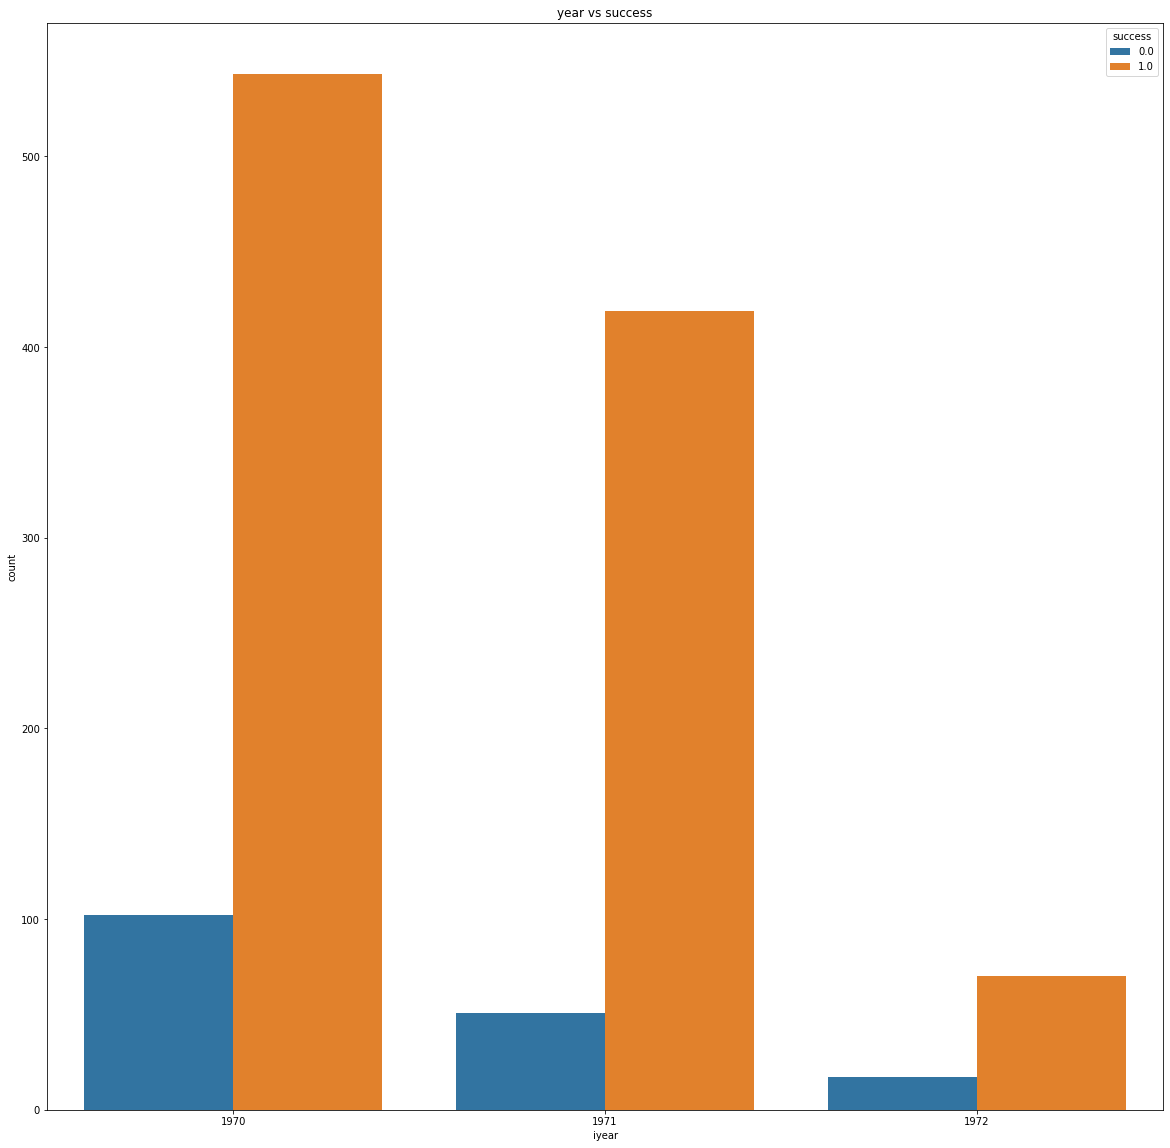

In [54]:
plt.figure(figsize=(20, 20))
sns.countplot(x = 'iyear',hue='success',data= data1)
plt.title('year vs success')
plt.show()

# year vs suicide

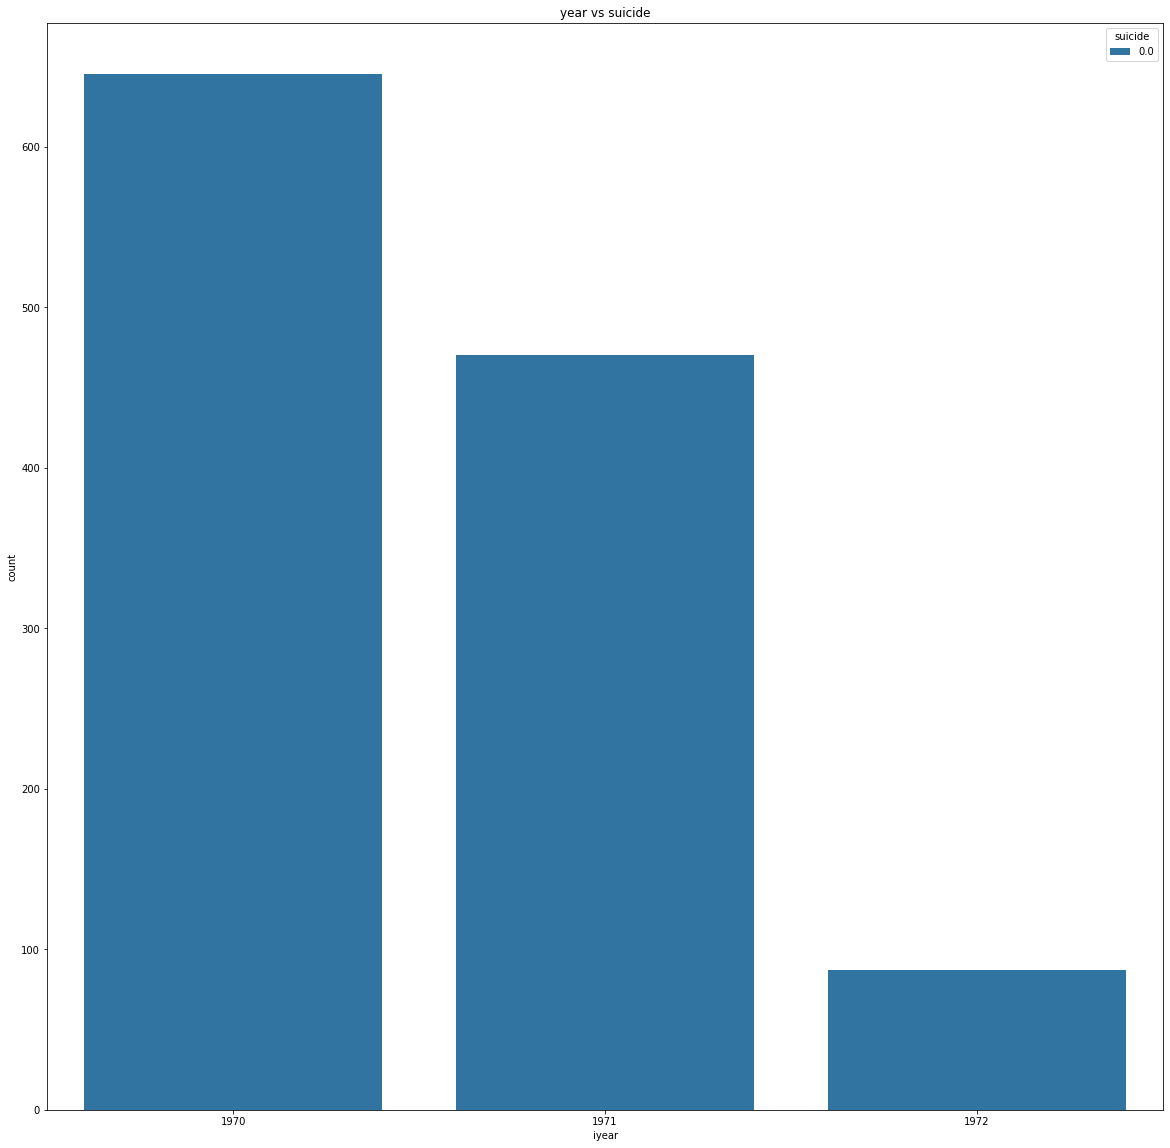

In [18]:
plt.figure(figsize=(20, 20))
sns.countplot(x = 'iyear',hue='suicide',data= data1)
plt.title('year vs suicide')
plt.show()

# year VS kill

Text(0.5, 1.0, 'year VS kill')

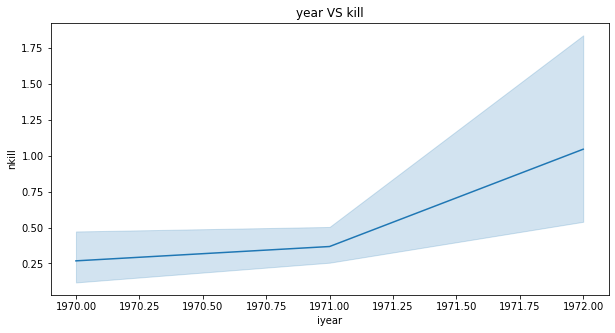

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x='iyear',y='nkill',data=data1)
plt.title("year VS kill")

# country Vs Kill

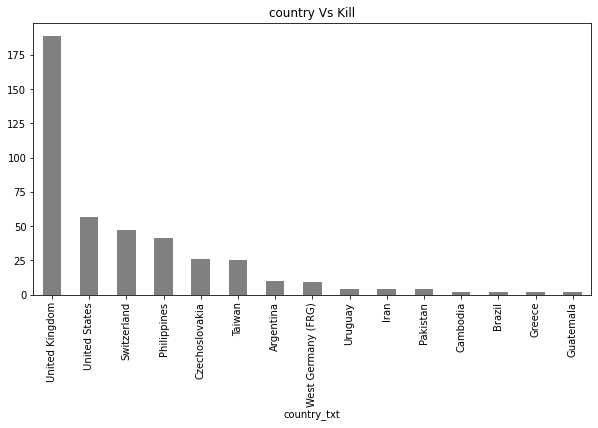

In [20]:
plt.figure(figsize = (10,5))
data1.groupby(['country_txt'])['nkill'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'gray')

plt.xticks(rotation=90)
plt.title("country Vs Kill")
plt.show()

# target vs Kill

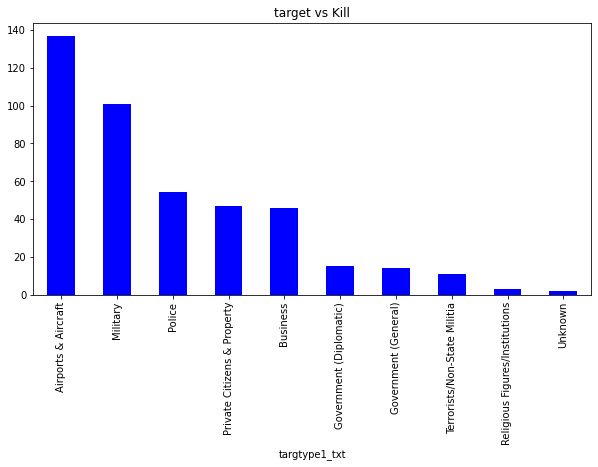

In [21]:
plt.figure(figsize = (10,5))
data1.groupby(['targtype1_txt'])['nkill'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'blue')

plt.xticks(rotation=90)
plt.title("target vs Kill")
plt.show()

# Weapon Vs Kill

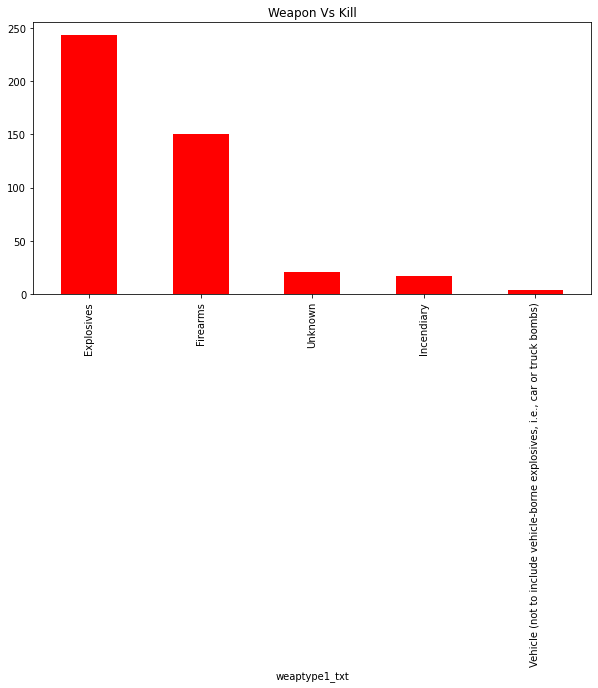

In [22]:

plt.figure(figsize = (10,5))
data1.groupby(['weaptype1_txt'])['nkill'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar', color = 'red')

plt.xticks(rotation=90)
plt.title("Weapon Vs Kill")
plt.show()

# Visualisation of kills in United State on the map

In [42]:
United_State=data1[data1["country_txt"] =="United States" ]
United_State.to_csv("united_state.csv")
United_State.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,success,suicide,nwound,nkill,attacktype1_txt,targtype1_txt,gname,natlty1_txt,weaptype1_txt,latitude,longitude
5,1970,1,1,United States,North America,Illinois,Cairo,1.0,0.0,0.0,0.0,Armed Assault,Police,Black Nationalists,United States,Firearms,37.005105,-89.176269
7,1970,1,2,United States,North America,California,Oakland,1.0,0.0,0.0,0.0,Bombing/Explosion,Utilities,Unknown,United States,Explosives,37.791927,-122.225906
8,1970,1,2,United States,North America,Wisconsin,Madison,1.0,0.0,0.0,0.0,Facility/Infrastructure Attack,Military,New Year's Gang,United States,Incendiary,43.076592,-89.412488
9,1970,1,3,United States,North America,Wisconsin,Madison,1.0,0.0,0.0,0.0,Facility/Infrastructure Attack,Government (General),New Year's Gang,United States,Incendiary,43.072950,-89.386694
10,1970,1,1,United States,North America,Wisconsin,Baraboo,0.0,0.0,0.0,0.0,Bombing/Explosion,Military,"Weather Underground, Weathermen",United States,Explosives,43.468500,-89.744299


In [32]:
len(United_State)

737

In [46]:
import folium
import numpy as np
# Visualisation des données sur une carte
m=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=12,min_zoom=2)
for i in range(0,len(United_State)):
  folium.Circle(
      location=[United_State.iloc[i]['latitude'],United_State.iloc[i]['longitude']],
      fill=True,
      radius=(int((np.log(United_State.iloc[i,10]+1.00001)))+0.2)*50000,
      color='blue',
      fill_color='blue',
      tooltip = "<div style='margin: 0; background-color: pink; color: blue;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+United_State.iloc[i]['city'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: black;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li> City: "+str(United_State.iloc[i,7])+"</li>"
                    "</ul></div>",
                
        ).add_to(m)
   
m

# Visualisation of kills in United Kingdom on the map

In [48]:
United_Kingdom=data1[data1["country_txt"] =="United Kingdom" ]
United_Kingdom.to_csv("United_Kingdom.csv")
United_Kingdom.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,success,suicide,nwound,nkill,attacktype1_txt,targtype1_txt,gname,natlty1_txt,weaptype1_txt,latitude,longitude
364,1970,6,26,United Kingdom,Western Europe,Northern Ireland,Londonderry,0.0,0.0,0.0,5.0,Armed Assault,Terrorists/Non-State Militia,Irish Republican Army (IRA),Northern Ireland,Incendiary,55.011562,-7.312045
365,1970,6,27,United Kingdom,Western Europe,Northern Ireland,Londonderry,1.0,0.0,0.0,3.0,Armed Assault,Private Citizens & Property,Irish Republican Army (IRA),Northern Ireland,Firearms,55.011562,-7.312045
366,1970,6,27,United Kingdom,Western Europe,Northern Ireland,Belfast,1.0,0.0,0.0,1.0,Armed Assault,Private Citizens & Property,Irish Republican Army (IRA),Northern Ireland,Firearms,54.607712,-5.956210
367,1970,6,27,United Kingdom,Western Europe,Northern Ireland,Belfast,1.0,0.0,0.0,1.0,Armed Assault,Private Citizens & Property,Irish Republican Army (IRA),Northern Ireland,Firearms,54.607712,-5.956210
368,1970,6,27,United Kingdom,Western Europe,Northern Ireland,Belfast,1.0,0.0,1.0,3.0,Armed Assault,Religious Figures/Institutions,Ulster Volunteer Force (UVF),Northern Ireland,Firearms,54.607712,-5.956210


In [49]:
# Visualisation des données sur une carte
m=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=12,min_zoom=2)
for i in range(0,len(United_Kingdom)):
  folium.Circle(
      location=[United_Kingdom.iloc[i]['latitude'],United_Kingdom.iloc[i]['longitude']],
      fill=True,
      radius=(int((np.log(United_Kingdom.iloc[i,10]+1.00001)))+0.2)*50000,
      color='green',
      fill_color='green',
      tooltip = "<div style='margin: 0; background-color: pink; color: blue;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+United_Kingdom.iloc[i]['city'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: black;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li> City: "+str(United_Kingdom.iloc[i,7])+"</li>"
                    "</ul></div>",
                
        ).add_to(m)
   
m

# Visualisation of kills in Philippines on the map

In [50]:
Philippines=data1[data1["country_txt"] =="Philippines" ]
Philippines.to_csv("Philippines.csv")
Philippines.head()


,iyear,imonth,iday,country_txt,region_txt,provstate,city,success,suicide,nwound,nkill,attacktype1_txt,targtype1_txt,gname,natlty1_txt,weaptype1_txt,latitude,longitude
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1.0,0.0,0.0,1.0,Assassination,Journalists & Media,Unknown,United States,Unknown,15.478598,120.599741
26,1970,1,21,Philippines,Southeast Asia,Metropolitan Manila,Quezon City,1.0,0.0,0.0,0.0,Bombing/Explosion,Government (Diplomatic),Unknown,United States,Explosives,14.674280,121.057495
39,1970,1,31,Philippines,Southeast Asia,Tarlac,Bamban,0.0,0.0,1.0,0.0,Unknown,Military,New People's Army (NPA),United States,Unknown,15.675051,120.331618
96,1970,3,0,Philippines,Southeast Asia,Metropolitian Manila,Manila,1.0,0.0,0.0,0.0,Bombing/Explosion,Government (Diplomatic),Unknown,United States,Explosives,14.596051,120.978666
150,1970,3,24,Philippines,Southeast Asia,Pampanga,Angeles,1.0,0.0,0.0,1.0,Unknown,Military,Unknown,United States,Unknown,15.153002,120.591942


In [51]:
# Visualisation des données sur une carte
m=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=12,min_zoom=2)
for i in range(0,len(Philippines)):
  folium.Circle(
      location=[Philippines.iloc[i]['latitude'],Philippines.iloc[i]['longitude']],
      fill=True,
      radius=(int((np.log(Philippines.iloc[i,10]+1.00001)))+0.2)*50000,
      color='gray',
      fill_color='gray',
      tooltip = "<div style='margin: 0; background-color: pink; color: blue;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+Philippines.iloc[i]['city'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: black;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li> City: "+str(Philippines.iloc[i,7])+"</li>"
                    "</ul></div>",
                
        ).add_to(m)
   
m

# Conclusion : 

 

*   **United Kingdom** has the most number of kills
*  **Explosives** is the most weapon of kills 
  
